In [1]:
import pandas as pd

# Merging with Yulian Data

In [2]:
dang_speech_data = pd.read_csv("dang_speech.csv")
dang_speech_yulian = pd.read_csv("dang_speech_yulian.csv", encoding="latin1")

In [3]:
dang_speech_data = dang_speech_data[['Tweet Text', 'KS', 'KH', 'DH', 'TDH', 'SWA', 'LO', 'AK']].fillna(0).rename(columns={"Tweet Text": "Tweet"})
display(dang_speech_data.head())
print(dang_speech_data.shape)

,Tweet,KS,KH,DH,TDH,SWA,LO,AK
0,Sudah bodoh buat hoaks pula 👇🏻 https://t.co/qK...,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,"Penggugatnya berarti bodoh , kalau mau cari ja...",0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,"Jangan arogan cul @PDI_Perjuangan , fokus saja...",0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,RT @ChusnulCh__: Si b4nci gagap caper Iagi.😂😝\...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"Kadrot , kadrun peot 👇🏻 https://t.co/04vLXm1WBF",0.0,0.0,1.0,0.0,0.0,0.0,0.0


(184, 8)


In [4]:
display(dang_speech_yulian.head())
print(dang_speech_yulian.shape)

display(dang_speech_yulian[['KS', 'KH', 'DH', 'TDH', 'SWA', 'LO', 'AK']].sum())

,Tweet,KS,KH,DH,TDH,SWA,LO,AK
0,Ini pasti salah Jokowi Ahok dan kafir-kafir at...,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,@fahmiabuazzam1 biar aja biar tai nya kena bap...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,RT @Lupuz0503: Prestasi Ahok Selain mjadi mafi...,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,Ulama Kompak Nyatakan Haram Pemimpin Kafir Pil...,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,KAU PENDIKAN TINGGI TAPI BODOH....GK ADA LARAN...,1.0,0.0,0.0,1.0,0.0,0.0,0.0


(900, 8)


KS     419.0
KH     111.0
DH     320.0
TDH    670.0
SWA      6.0
LO       5.0
AK     112.0
dtype: float64

In [5]:
dang_speech_merge = pd.concat([dang_speech_data, dang_speech_yulian], ignore_index=True)
dang_speech_merge.head()

,Tweet,KS,KH,DH,TDH,SWA,LO,AK
0,Sudah bodoh buat hoaks pula 👇🏻 https://t.co/qK...,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,"Penggugatnya berarti bodoh , kalau mau cari ja...",0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,"Jangan arogan cul @PDI_Perjuangan , fokus saja...",0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,RT @ChusnulCh__: Si b4nci gagap caper Iagi.😂😝\...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"Kadrot , kadrun peot 👇🏻 https://t.co/04vLXm1WBF",0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
display(dang_speech_merge[['KS', 'KH', 'DH', 'TDH', 'SWA', 'LO', 'AK']].sum())
print(dang_speech_merge.shape)

KS     477.0
KH     118.0
DH     398.0
TDH    801.0
SWA     11.0
LO       5.0
AK     117.0
dtype: float64

(1084, 8)


In [7]:
dang_speech_merge.to_csv("dang_speech_merge.csv")

# Make Model

## Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

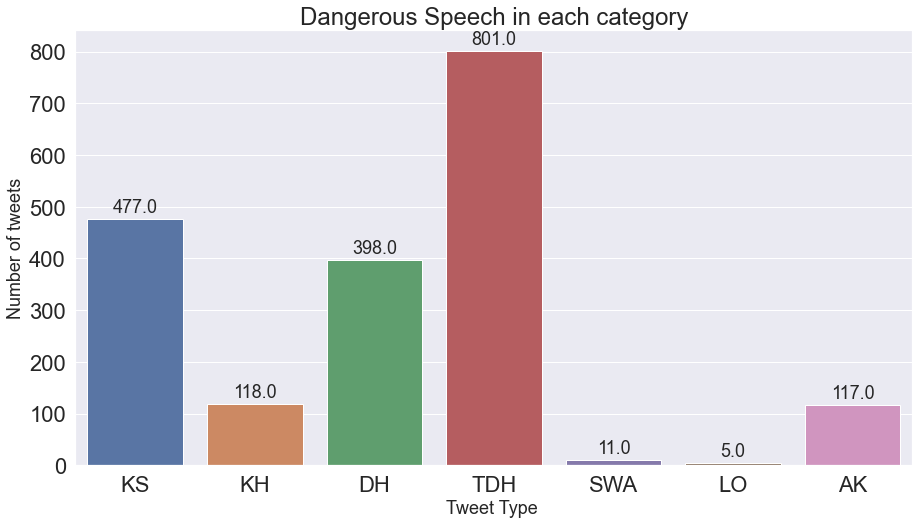

In [9]:
categories = list(dang_speech_merge.columns.values)[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
labels = dang_speech_merge.iloc[:,1:].sum().values
ax=sns.barplot(x=categories, y=labels)

plt.title("Dangerous Speech in each category", fontsize=24)
plt.ylabel('Number of tweets', fontsize=18)
plt.xlabel('Tweet Type ', fontsize=18)#adding the text labels

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

## Preprocessing

In [10]:
import re
from tqdm import tqdm
from nlp_id.tokenizer import Tokenizer
from nlp_id.lemmatizer import Lemmatizer 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [11]:
# Import kamus bahasa slang
slang_dict = pd.read_csv('https://raw.githubusercontent.com/muhammadariffaizin/sistem-temu-kembali-informasi/master/list/slang.txt', delimiter = ";")
dict_slang = dict(slang_dict.values)
print (slang_dict)

          &                                          dan
0         +                                       tambah
1         /                                         atau
2     22nya                                   dua-duanya
3        3m  mencuci tangan memakai masker menjaga jarak
4       7an                                       tujuan
...     ...                                          ...
5592  yyaaa                                           ya
5593      z                                         saja
5594     za                                         saja
5595   zama                                        zaman
5596   zonk                                        bodoh

[5597 rows x 2 columns]


In [12]:
bungs = pd.read_csv("bungs.csv")
print(bungs.shape)

catatanali07 = pd.read_csv("catatanali07.csv")
print(catatanali07.shape)

(67950, 17)
(1209, 17)


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
lemmatizer = Lemmatizer()
tokenizer = Tokenizer()
stop_factory = StopWordRemoverFactory()

data_stopword = stop_factory.get_stop_words()

In [14]:
def preprocess(s):
    s = re.sub(r'(\\x[0-9a-fA-Z]{2})', '', s)
  #Remove URL
    s = re.sub(r'https?://\S+|www\.\S+', " ", s)
  #Remove Mentions
    s = re.sub(r'@\w+',' ',s)
  #Remove Punctuation
    s= re.sub(r'[^\w\s\d]',' ',s)
  #Remove Digits
    s = re.sub(r'\d+', ' ', s)
  #Remove HTML tags
    s = re.sub('r<.*?>',' ', s)
  #Remove Hastags
    s = re.sub(r'#\w+', ' ', s)
    s = re.sub(r'[^a-zA-Z]', ' ', s) # remove symbol dan angka
    hasil=[]
    word_token = tokenizer.tokenize(s) #tokenisasi
    for word in word_token:
        word = word.strip().lower()   #case folding
        if word in dict_slang:
            word = dict_slang[word]
        if len(word) > 3:
          #word = lemmatizer.lemmatize(word) #lemmatization
          hasil.append(word)
        else:
            continue
    result_sentence = " ".join(hasil).strip() #penggabungan kata hasil pre prosesing
    #print(result_sentence)
    return result_sentence

In [15]:
data_raw_bungs = bungs
data_raw_catatanali07 = catatanali07

#Melakukan Proses Pre Prosesing pada Kolom text Dataset 
result_preprocess_bungs = []
for i, row in tqdm(data_raw_bungs.iterrows(), total=data_raw_bungs.shape[0]):
  result_preprocess_bungs.append(preprocess(row['Tweet Text']))

#Melakukan Proses Pre Prosesing pada Kolom text Dataset 
result_preprocess_catatanali07 = []
for i, row in tqdm(data_raw_catatanali07.iterrows(), total=data_raw_catatanali07.shape[0]):
  result_preprocess_catatanali07.append(preprocess(row['Tweet Text']))

100%|██████████| 1209/1209 [00:00<00:00, 2864.41it/s]


In [16]:
data_raw_bungs['text_clean'] = result_preprocess_bungs
data_raw_catatanali07['text_clean'] = result_preprocess_catatanali07

print("Bungs : ", data_raw_bungs.shape)
print("Catatanali07 : ", data_raw_catatanali07.shape)
data_raw_bungs = data_raw_bungs[(data_raw_bungs['text_clean'].str.split(" ").str.len() > 2)]
data_raw_catatanali07 = data_raw_catatanali07[(data_raw_catatanali07['text_clean'].str.split(" ").str.len() > 2)]

print("Bungs Preprocessed : ", data_raw_bungs.shape)
print("Catatanali07 Preprocessed : ", data_raw_catatanali07.shape)

data_raw_bungs.to_csv("bungs_preprocessed.csv")
data_raw_catatanali07.to_csv("catatanali07_preprocessed.csv")

Bungs :  (67950, 18)
Catatanali07 :  (1209, 18)
Bungs Preprocessed :  (48569, 18)
Catatanali07 Preprocessed :  (734, 18)
